##  1. Fuel price prediction


https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/


    No: row number
    year: year of data in this row
    month: month of data in this row
    day: day of data in this row
    hour: hour of data in this row
    pm2.5: PM2.5 concentration
    DEWP: Dew Point
    TEMP: Temperature
    PRES: Pressure
    cbwd: Combined wind direction
    Iws: Cumulated wind speed
    Is: Cumulated hours of snow
    Ir: Cumulated hours of rain


### 2. Basic Data Preparation

In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [534]:
# If we want to do time series manipulation, we’ll need to have a date time index so that our data frame is indexed on 
# the timestamp.
df = pd.read_csv('bhutan_fuel_prices.csv', parse_dates=['Approved_Date'], index_col='Approved_Date')
df.head()  

Region      Product  \
Approved_Date                                
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   
2022-04-01     Western Region  HSD (in KL)   

                                            Company        Station     RSP/KL  \
Approved_Date                                                                   
2022-04-01     Bharat Petroleum Corporation Limited  Phuentsholing   98497.76   
2022-04-01     Bharat Petroleum Corporation Limited    Rinchending   98578.22   
2022-04-01     Bharat Petroleum Corporation Limited        Pasakha   98631.86   
2022-04-01     Bharat Petroleum Corporation Limited     Chimakothi  100206.55   
2022-04-01     Bharat Petroleum Corporation Limited   Lungtenzampa  100650.06   

                RSP/L  
Approved_Date          
2022-04-01      98.50  
2022-04-01      98.58  
2022-04-01      98.63  
2022-04-01     100.21  
2022-04-01     100.65

In [535]:
df.describe()

RSP/KL         RSP/L
count   11377.000000  11377.000000
mean    63861.075735     63.830219
std     13877.545175     13.916225
min         0.000000      0.000000
25%     54723.670000     54.680000
50%     63047.280000     63.050000
75%     72826.080000     72.830000
max    103511.930000    103.510000

In [536]:
df.dtypes

Region      object
Product     object
Company     object
Station     object
RSP/KL     float64
RSP/L      float64
dtype: object

In [537]:
df.shape

(11378, 6)

In [538]:
df.isna().sum()

Region      0
Product     1
Company    16
Station    30
RSP/KL      1
RSP/L       1
dtype: int64

In [539]:
# Total number of fuel stations in Bhutan

len(df.Station.unique())

69

In [540]:
df.Product.value_counts()


HSD (in KL)    5745
MS (in KL)     5614
SKO (in KL)      18
Name: Product, dtype: int64

In [541]:
index_names = df[ df['Product'] == 'SKO (in KL)' ].index
  
# drop these row indices from dataFrame
df.drop(index_names, inplace = True)

In [542]:
df.Product.value_counts()

HSD (in KL)    5654
MS (in KL)     5524
Name: Product, dtype: int64

In [543]:
df['Product'] = df['Product'].replace('HSD (in KL)', 'Diesel')
df['Product'] = df['Product'].replace('MS (in KL)', 'Petrol')
df.head()

Region Product                               Company  \
Approved_Date                                                                 
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   

                     Station     RSP/KL   RSP/L  
Approved_Date                                    
2022-04-01     Phuentsholing   98497.76   98.50  
2022-04-01       Rinchending   98578.22   98.58  
2022-04-01           Pasakha   98631.86   98.63  
2022-04-01        Chimakothi  100206.55  100.21  
2022-04-01      Lungtenzampa  100650.06  100.65

In [544]:
df.Region.value_counts()


Western Region    4642
Eastern Region    3582
Central Region    2954
                    1
Name: Region, dtype: int64

In [545]:
# In the above, we see that there is one unique Region, we will try to check the uniques values
df.Region.unique()

array(['Western Region', 'Central Region', 'Eastern Region', '\x1a'],
      dtype=object)

In [546]:
index_names = df[ df['Region'] == '\x1a' ].index
  
# drop these row indices from dataFrame
df.drop(index_names, inplace = True)

In [547]:
df.Region.unique()

array(['Western Region', 'Central Region', 'Eastern Region'], dtype=object)

In [548]:
df.Company.value_counts()

Indian Oil Corporation Limited             5870
Bharat Petroleum Corporation Limited       5069
Hindustan Petroleum Corporation Limited     224
Name: Company, dtype: int64

In [549]:
# Drop the "RSP/KL" column
df.drop(["RSP/KL"], axis = 1, inplace = True)

### EDA and Visualization

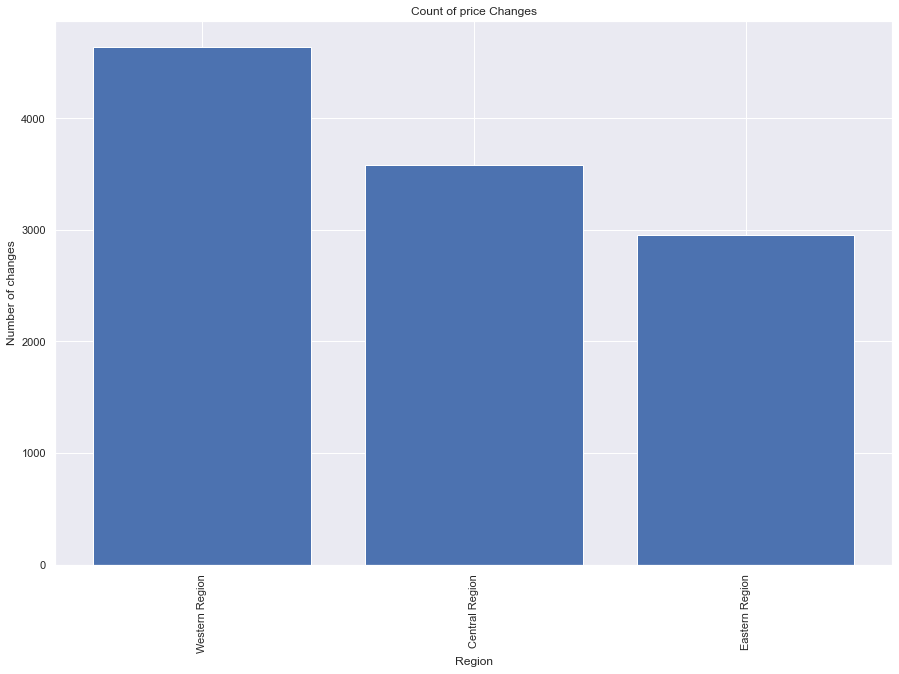

In [550]:

x = df.Region.unique()
y = df.Region.value_counts()[:20]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of price Changes')
plt.xlabel('Region')
plt.ylabel('Number of changes')
plt.xticks(rotation=90)
plt.show()

In [551]:
df[df['RSP/L'] == df['RSP/L'].max()]

Region Product                               Company  \
Approved_Date                                                                 
2022-04-01     Eastern Region  Diesel  Bharat Petroleum Corporation Limited   

               Station   RSP/L  
Approved_Date                   
2022-04-01     Lhuntse  103.51

In [552]:
df[df['RSP/L'] == df['RSP/L'].min()]

Region Product  \
Approved_Date                           
2022-01-16     Western Region  Diesel   
2022-01-16     Western Region  Diesel   
2021-08-16     Western Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Central Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2021-06-16     Eastern Region  Diesel   
2020-04-16     Western Region  Petrol   
2021-03-16     Western Region  Diesel   

                                               Company Station  RSP/L  
Approved_Date                                                          
2022-01-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2022-01-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2021-08-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2021-06-16              Indian Oil Corporation Limited     NaN    0.0  
2020-04-16     Hindustan Petroleum Corporation Limited     NaN    0.0  
2021-03-16     Hindustan Petroleum Corporation Limited     NaN    0.0

### Fill null values with most_frequent values

In [553]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Region'] = imp.fit_transform(df[['Region']])
df['Product'] = imp.fit_transform(df[['Product']])
df['Company'] = imp.fit_transform(df[['Company']])
df['Station'] = imp.fit_transform(df[['Station']])

In [554]:
df.isnull().sum()

Region     0
Product    0
Company    0
Station    0
RSP/L      0
dtype: int64

In [555]:
df.head()

Region Product                               Company  \
Approved_Date                                                                 
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   
2022-04-01     Western Region  Diesel  Bharat Petroleum Corporation Limited   

                     Station   RSP/L  
Approved_Date                         
2022-04-01     Phuentsholing   98.50  
2022-04-01       Rinchending   98.58  
2022-04-01           Pasakha   98.63  
2022-04-01        Chimakothi  100.21  
2022-04-01      Lungtenzampa  100.65

### Use LabelEncoder to encode categorical features

In [556]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['Product'] = le.fit_transform(df['Product'])
df['Company'] = le.fit_transform(df['Company'])
df['Station'] = le.fit_transform(df['Station'])

In [557]:
df.head()

Region  Product  Company  Station   RSP/L
Approved_Date                                           
2022-04-01          2        0        0       45   98.50
2022-04-01          2        0        0       52   98.58
2022-04-01          2        0        0       43   98.63
2022-04-01          2        0        0        7  100.21
2022-04-01          2        0        0       31  100.65

In [558]:
df.Region.unique()

array([2, 0, 1])

In [559]:
df.Product.unique()

array([0, 1])

In [560]:
df.Company.unique()

array([0, 2, 1])

In [561]:
df.Station.unique()

array([45, 52, 43,  7, 31, 42, 22,  1,  2, 57, 59, 19, 15, 25, 14, 34, 37,
       40, 27, 66, 47, 16, 58, 10, 64, 67, 63,  4,  9, 28, 11, 39, 60, 17,
       18, 53, 65, 61, 62, 33, 21, 24, 44, 29, 23,  0, 12,  3, 51, 35, 54,
       36, 55, 30,  8, 41, 56, 38, 32, 13, 26,  6, 20, 49, 46, 48, 50,  5])

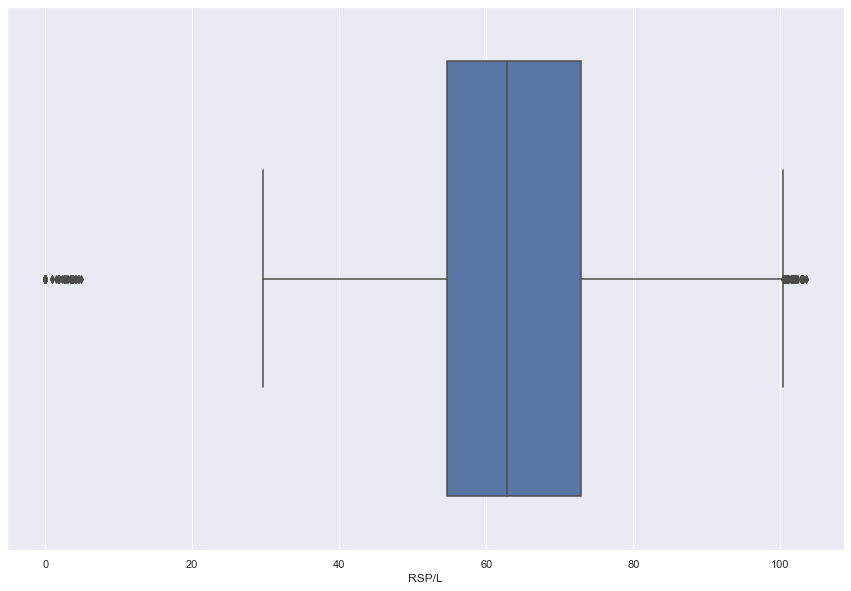

In [562]:
# Ploting boxplot to check outliers in price
sns.boxplot(x=df['RSP/L'])
plt.show()

Text(0, 0.5, 'Retail Selling Price')

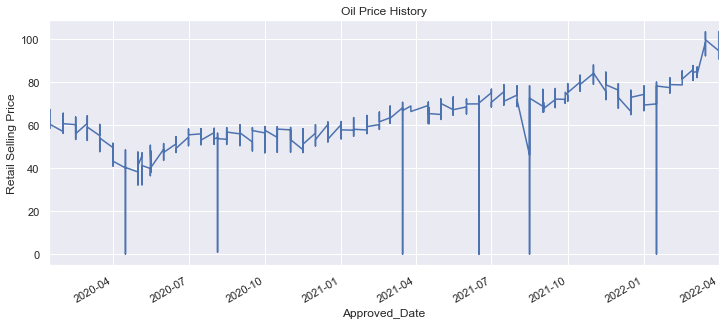

In [563]:
plt.title('Oil Price History')

df['RSP/L'].plot(figsize=(12,5)).autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Retail Selling Price')

In [564]:
# calculating IQR and upper limit and lower limit to find outliers
Q1 = df['RSP/L'].quantile(0.25)
Q3 = df['RSP/L'].quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print('upper limit: {}'.format(upperlimit))
print('lower limit: {}'.format(lowerlimit))

upper limit: 100.355
lower limit: 27.195000000000004


In [565]:
## checking outliers
df[(df['RSP/L'] < lowerlimit)  | (df['RSP/L'] > upperlimit)]

Region  Product  Company  Station   RSP/L
Approved_Date                                           
2022-04-01          2        0        0       31  100.65
2022-04-01          2        0        0       42  100.67
2022-04-01          2        0        0       22  101.50
2022-04-01          2        0        0        1  100.77
2022-04-01          2        0        0        2  101.09
...               ...      ...      ...      ...     ...
2020-08-05          1        1        2       23    1.71
2020-08-05          1        1        2        0    4.53
2020-08-05          1        1        2       12    3.54
2020-08-05          1        1        2        3    2.32
2020-08-05          1        1        2       51    3.47

[192 rows x 5 columns]

In [566]:
## Drop all the rows containing height beyond lower and upper limit.
df = df[(df['RSP/L'] > lowerlimit) & (df['RSP/L'] < upperlimit)]
df.shape

(10986, 5)

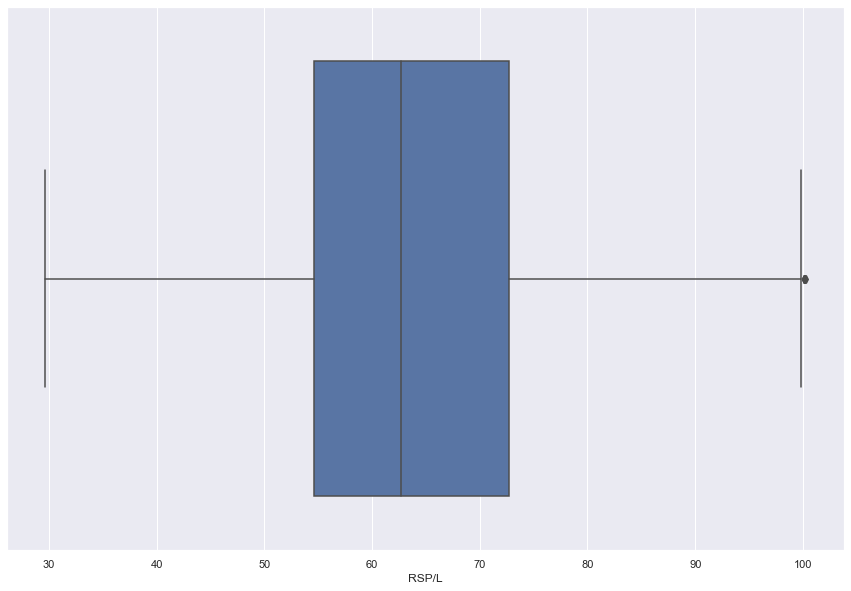

In [567]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df['RSP/L'])
plt.show()

In [568]:
df.to_csv('price.csv')

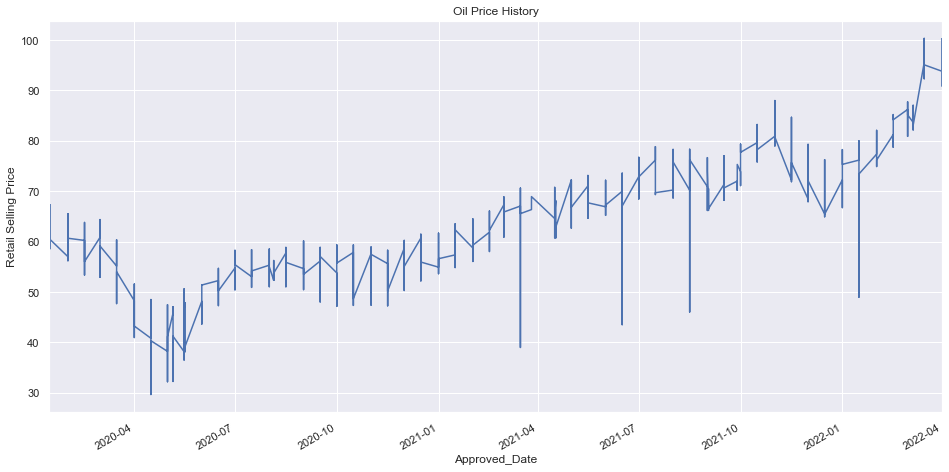

In [569]:
plt.title('Oil Price History')
df['RSP/L'].plot(figsize=(16,8)).autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Retail Selling Price')
plt.show()

In [570]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # df = scaler.fit_transform(numerical_features.drop(columns='RSP/L', axis=1))
# df['Region'] = scaler.fit_transform(df[['Region']])
# df['Product'] = scaler.fit_transform(df[['Product']])
# df['Company'] = scaler.fit_transform(df[['Company']])
# df['Station'] = scaler.fit_transform(df[['Station']])
# df['RSP/L'] = scaler.fit_transform(df[['RSP/L']])

In [571]:
from pandas import read_csv
from datetime import datetime
# load data
# def parse(x):
#     return datetime.strptime(x, '%Y %d %m')
dataset = read_csv('price.csv', parse_dates=['Approved_Date'], index_col='Approved_Date')
dataset.head()

Region  Product  Company  Station   RSP/L
Approved_Date                                           
2022-04-01          2        0        0       45   98.50
2022-04-01          2        0        0       52   98.58
2022-04-01          2        0        0       43   98.63
2022-04-01          2        0        0        7  100.21
2022-04-01          2        0        0       57   98.00

In [572]:
df.dtypes

Region       int32
Product      int32
Company      int32
Station      int32
RSP/L      float64
dtype: object

In [573]:

# dataset.drop('No', axis=1, inplace=True)
# # manually specify column names
# dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
# dataset.index.name = 'date'
# # mark all NA values with 0
# dataset['pollution'].fillna(0, inplace=True)
# # drop the first 24 hours
# dataset = dataset[24:]
# # summarize first 5 rows
# print(dataset.head(5))
# # save to file
# dataset.to_csv('pollution.csv')

In [574]:
# # load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# dataset.head()

Running the example creates a plot with 7 subplots showing the 5 years of data for each variable.

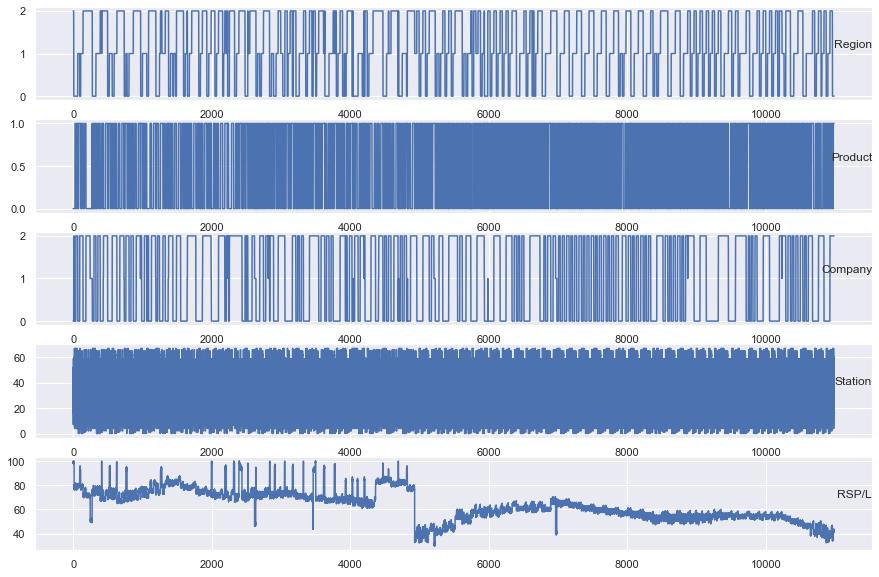

In [575]:
from matplotlib import pyplot

values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,  4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

### 3. Multivariate LSTM Forecast Model

### LSTM Data Preparation

In [576]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = read_csv('price.csv', header=0, index_col=0)
values = dataset.values
# # integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
# values = values.astype('float32')

### Scale the data

In [577]:

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)


In [578]:
scaled[0]

array([1.        , 0.        , 0.        , 0.67164179, 0.97451508])

In [579]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var5(t)
1        1.0        0.0        0.0   0.671642   0.974515  0.975648
2        1.0        0.0        0.0   0.776119   0.975648  0.976356
3        1.0        0.0        0.0   0.641791   0.976356  0.998726
4        1.0        0.0        0.0   0.104478   0.998726  0.967436
5        1.0        0.0        0.0   0.850746   0.967436  0.991505

### Define and Fit Model

In [580]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [581]:

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 5) (8760,) (2225, 1, 5) (2225,)


In [582]:
train_X[0]

array([[1.        , 0.        , 0.        , 0.67164179, 0.97451508]])

In [583]:
train_y[0]

0.9756477417527962

### Training and testing loss plots

Epoch 1/50
122/122 - 2s - loss: 0.2300 - val_loss: 0.0724 - 2s/epoch - 17ms/step
Epoch 2/50
122/122 - 1s - loss: 0.1191 - val_loss: 0.0478 - 533ms/epoch - 4ms/step
Epoch 3/50
122/122 - 1s - loss: 0.1043 - val_loss: 0.0388 - 533ms/epoch - 4ms/step
Epoch 4/50
122/122 - 1s - loss: 0.0913 - val_loss: 0.0365 - 549ms/epoch - 5ms/step
Epoch 5/50
122/122 - 1s - loss: 0.0778 - val_loss: 0.0349 - 502ms/epoch - 4ms/step
Epoch 6/50
122/122 - 1s - loss: 0.0667 - val_loss: 0.0332 - 549ms/epoch - 5ms/step
Epoch 7/50
122/122 - 1s - loss: 0.0561 - val_loss: 0.0305 - 549ms/epoch - 5ms/step
Epoch 8/50
122/122 - 1s - loss: 0.0468 - val_loss: 0.0270 - 549ms/epoch - 5ms/step
Epoch 9/50
122/122 - 1s - loss: 0.0374 - val_loss: 0.0231 - 534ms/epoch - 4ms/step
Epoch 10/50
122/122 - 1s - loss: 0.0305 - val_loss: 0.0217 - 518ms/epoch - 4ms/step
Epoch 11/50
122/122 - 1s - loss: 0.0252 - val_loss: 0.0190 - 549ms/epoch - 5ms/step
Epoch 12/50
122/122 - 1s - loss: 0.0228 - val_loss: 0.0182 - 518ms/epoch - 4ms/step
Epo

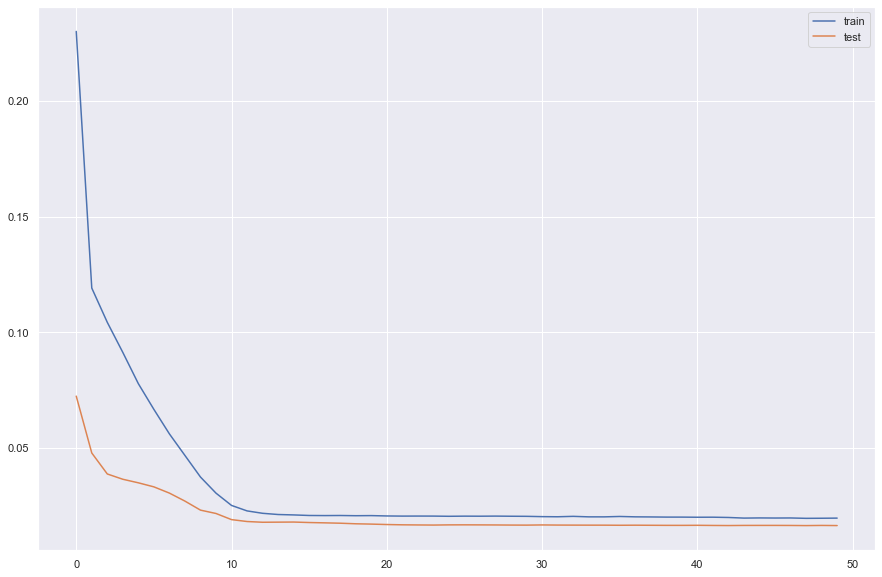

In [584]:
# design network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [585]:
test_X.shape

(2225, 1, 5)

### Evaluate Model

In [586]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import concatenate

# make a prediction

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.051


# Train On Multiple Lag Timesteps Example

In [587]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [588]:
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In [589]:

# load dataset
dataset = read_csv('price.csv', header=0, index_col=0)
values = dataset.values

In [590]:

# # integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

In [591]:

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [592]:

# specify the number of lag hours
n_hours = 4
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)
 

(10982, 25)


In [593]:

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [594]:

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(8760, 20) 8760 (8760,)


In [595]:

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 

(8760, 4, 5) (8760,) (2222, 4, 5) (2222,)


In [596]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Epoch 1/50
122/122 - 2s - loss: 0.1928 - val_loss: 0.0632 - 2s/epoch - 19ms/step
Epoch 2/50
122/122 - 1s - loss: 0.0549 - val_loss: 0.0548 - 565ms/epoch - 5ms/step
Epoch 3/50
122/122 - 1s - loss: 0.0511 - val_loss: 0.0556 - 586ms/epoch - 5ms/step
Epoch 4/50
122/122 - 1s - loss: 0.0498 - val_loss: 0.0517 - 560ms/epoch - 5ms/step
Epoch 5/50
122/122 - 1s - loss: 0.0500 - val_loss: 0.0507 - 581ms/epoch - 5ms/step
Epoch 6/50
122/122 - 1s - loss: 0.0531 - val_loss: 0.0483 - 549ms/epoch - 4ms/step
Epoch 7/50
122/122 - 1s - loss: 0.0450 - val_loss: 0.0480 - 566ms/epoch - 5ms/step
Epoch 8/50
122/122 - 1s - loss: 0.0479 - val_loss: 0.0453 - 549ms/epoch - 5ms/step
Epoch 9/50
122/122 - 1s - loss: 0.0420 - val_loss: 0.0473 - 580ms/epoch - 5ms/step
Epoch 10/50
122/122 - 1s - loss: 0.0417 - val_loss: 0.0451 - 549ms/epoch - 5ms/step
Epoch 11/50
122/122 - 1s - loss: 0.0412 - val_loss: 0.0427 - 581ms/epoch - 5ms/step
Epoch 12/50
122/122 - 1s - loss: 0.0391 - val_loss: 0.0400 - 564ms/epoch - 5ms/step
Epo

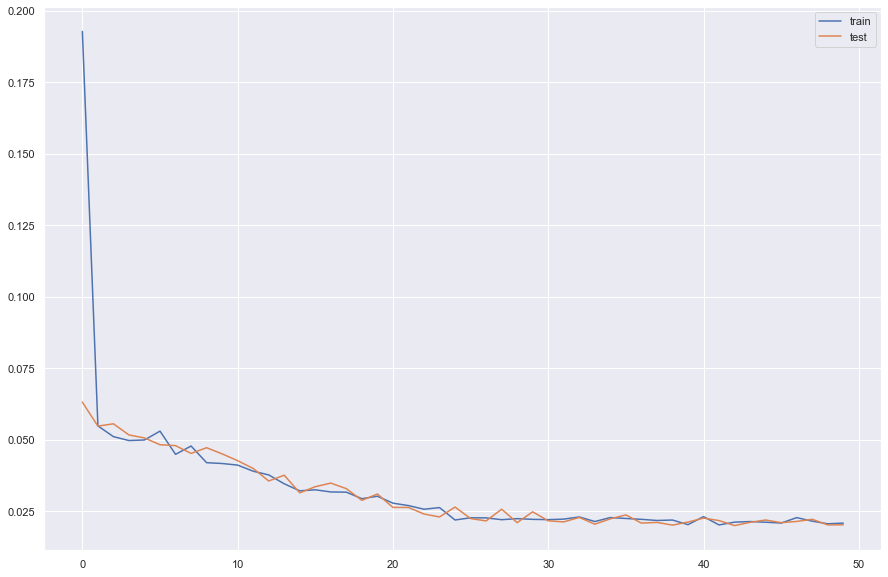

In [597]:

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [598]:

 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

In [610]:
y = pd.DataFrame(test_y, columns=['Predicted price'])
y.head()

Predicted price
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0

In [611]:
y_pred = pd.DataFrame(yhat, columns=['Predicted price'])
y_pred.head()

Predicted price
0         0.998103
1         0.002306
2        -0.003181
3        -0.003729
4        -0.002249

In [599]:
model.save('lstm.h5') 

In [600]:
# Recreate the exact same model, including its weights and the optimizer

import tensorflow as tf

new_model = tf.keras.models.load_model('lstm.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 50)                11200     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [613]:

y = pd.DataFrame(train_y, columns=['Predicted price'])
y.head()

Predicted price
0              1.0
1              1.0
2              1.0
3              1.0
4              1.0

In [614]:
y_pred = pd.DataFrame(model.predict(train_X), columns=['Predicted price'])
y_pred.head()

Predicted price
0         0.980955
1         0.980166
2         0.977318
3         0.979913
4         0.981867

In [615]:
# yhat[0]

In [616]:
# train_y[0]

In [617]:

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [618]:

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [619]:

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.238
